In [762]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import math
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler,StandardScaler
sns.set(rc={'figure.figsize':(12,8)})
pd.options.display.max_rows=None

In [821]:
class CustomeOneHotEncoder:
    def __init__(self,drop=False):
        self.columns_ = None
        self.drop_ = drop
        self.encoder = OneHotEncoder()
        
    def fit(self,data,columns):
        self.columns_ = columns
        self.encoder.fit(data[self.columns_])
    
    def fit_transform(self,data,columns):
        self.fit(data,columns)
        return self.transform(data)
    
    def transform(self,data):
        feature_array = self.encoder.transform(data[self.columns_]).toarray()
        feature_label = self.encoder.categories_
        new_feature_label = []
        for x,y in zip(self.columns_,feature_label):
            new_feature_label.append([x+'_'+str(z) for z in y])

        final_feature_label= np.concatenate([x for x in new_feature_label])
        encoded_df = pd.DataFrame(feature_array,columns=final_feature_label,index = data.index)

        if self.drop_:
            cols_to_drop = [x[0] for x in new_feature_label]
            encoded_df = encoded_df.drop(cols_to_drop,axis=1)
        data = data.drop(columns,axis=1)   
        #return encoded_df
        return pd.concat([data,encoded_df],axis=1)
    
def get_title(name,title=titles):
    if any(t in name for t in title):
        for tt in title:
            if name.find(tt) != -1:
                return tt
    else:
        return name
    
def transform_age(dataset):
    if not math.isnan(dataset.Age):
        return dataset.Age
    if dataset.Pclass == 1:
        if dataset.Sex == 'male':
            return 40
        else:
            return 35
    elif dataset.Pclass == 2:
        if dataset.Sex == 'male':
            return 30
        else:
            return 28
    else:
        if dataset.Sex == 'male':
            return 24
        else:
            return 22
            
    
def extract_cabin(cabin):
    if cabin == cabin:
        return cabin.split()[0][0]
    else:
        return 'No_Cabin'    
    
def get_age_group(age):
    if age <=13:
        return 1
    elif age >13 and age < 37:
        return 2
    elif age >=37 and age <60:
        return 3
    else:
        return 4
    
def process_cabin(data,fornull=True):
    if fornull:
        cabin_data = data[(data['Cabin'].isnull())]
    else:
        cabin_data = data[~(data['Cabin'].isnull())]
    y = cabin_data['Cabin_Codes']
    x = cabin_data[['Age','SibSp','Parch','Fare','Pclass','Sex','Age_Group','Title']]
    x.Age = x.apply(transform_age,axis=1)
    
    return x,y,cabin_data

# Data Preprocessing Train Data

In [823]:
data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [824]:
data['Total_Members'] = data['SibSp']+data['Parch']
data['Multiply'] = data['Pclass']*data['Age']

In [825]:
titles = ['Mr','Miss','Mrs','Jr','Dr','Rev','Master','Mme','Major','Ms','Mlle','Jonkheer','Don','Col','Capt','Countess']

In [826]:
data['Title'] = data['Name'].apply(get_title)

In [827]:
data['Title'].unique()

array(['Mr', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms', 'Major',
       'Jr', 'Mlle', 'Col', 'Capt', 'Countess', 'Jonkheer'], dtype=object)

In [828]:
data['Cabin_Codes'] = data['Cabin'].apply(extract_cabin)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Total_Members,Multiply,Title,Cabin_Codes
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,66.0,Mr,No_Cabin
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,38.0,Mr,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,78.0,Miss,No_Cabin
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,35.0,Mr,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,105.0,Mr,No_Cabin


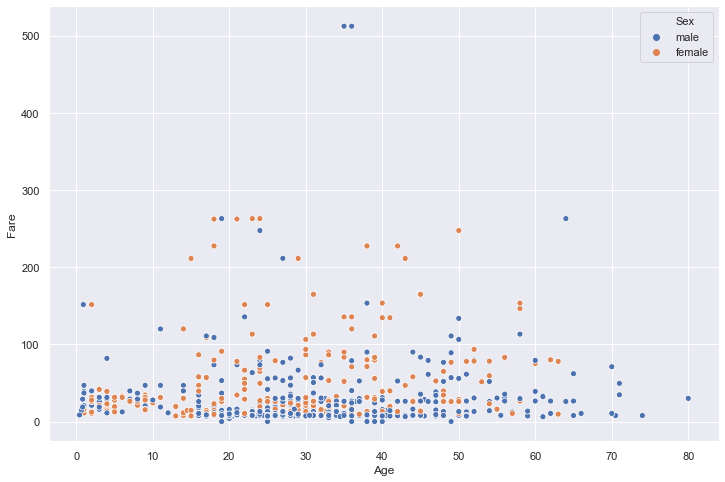

In [830]:
sns.scatterplot(x='Age',y='Fare',data=data,hue='Sex')

In [831]:
data['Age'] = data.apply(transform_age,axis=1)
data['Age_Group'] = data['Age'].apply(get_age_group)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Total_Members,Multiply,Title,Cabin_Codes,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1,66.0,Mr,No_Cabin,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,38.0,Mr,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,78.0,Miss,No_Cabin,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,1,35.0,Mr,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,105.0,Mr,No_Cabin,2


In [832]:
data = data.drop(['Ticket','Name','Cabin'])
data.isnull().sum()

PassengerId        0
Survived           0
Pclass             0
Name               0
Sex                0
Age                0
SibSp              0
Parch              0
Ticket             0
Fare               0
Cabin            687
Embarked           2
Total_Members      0
Multiply         177
Title              0
Cabin_Codes        0
Age_Group          0
dtype: int64

In [799]:
x,y,cabin_data = process_cabin(data,fornull=False)
#x = pd.get_dummies(x,columns=['Pclass','Sex','Age_Group','Title'],drop_first=True)

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [801]:
encoder = CustomeOneHotEncoder(drop=True)
encoder.fit(x,columns=['Pclass','Sex','Age_Group','Title'])
x = encoder.transform(x)

In [803]:
scaler = MinMaxScaler()
temp = scaler.fit_transform(x[['Age','Fare']])
x['Fare'] = temp[:,1]
x['Age'] = temp[:,0]
#x = x.drop(['Age'],axis=1)
x.head()

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Age_Group_2,Age_Group_3,Age_Group_4,Title_Col,Title_Countess,Title_Dr,Title_Major,Title_Master,Title_Miss,Title_Mlle,Title_Mme,Title_Mr
1,0.468892,1,0,0.139136,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.430956,1,0,0.103644,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.671219,0,0,0.101229,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
10,0.038948,1,1,0.032596,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
11,0.721801,0,0,0.051822,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [543]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2,shuffle=True)
clf = DecisionTreeClassifier()
kres = clf.fit(x_train,y_train)
cabin_data['Predicted'] = kres.predict(x)
temp =  kres.predict(x_train)
#acc = (cabin_data[cabin_data.Cabin_Codes == cabin_data.Predicted].count()/cabin_data.shape[0])[0]
print('Train Accuracy : ',metrics.accuracy_score(y_train, temp))
temp = kres.predict(x_test)
print('Test Accuracy : ',metrics.accuracy_score(y_test, temp))
print(kres.predict(x))

Train Accuracy :  1.0
Test Accuracy :  0.4146341463414634
['C' 'C' 'D' 'G' 'C' 'D' 'C' 'C' 'B' 'D' 'D' 'C' 'E' 'C' 'E' 'F' 'C' 'E'
 'B' 'D' 'D' 'C' 'B' 'D' 'D' 'G' 'D' 'C' 'B' 'D' 'C' 'E' 'B' 'A' 'C' 'F'
 'A' 'F' 'B' 'B' 'G' 'A' 'D' 'D' 'C' 'C' 'C' 'D' 'G' 'C' 'B' 'E' 'B' 'C'
 'C' 'C' 'D' 'E' 'B' 'D' 'C' 'C' 'B' 'E' 'C' 'C' 'E' 'C' 'B' 'C' 'E' 'C'
 'D' 'B' 'C' 'C' 'C' 'E' 'A' 'F' 'C' 'F' 'C' 'E' 'D' 'B' 'E' 'C' 'B' 'D'
 'G' 'C' 'E' 'C' 'A' 'B' 'C' 'A' 'C' 'C' 'C' 'E' 'D' 'E' 'E' 'D' 'A' 'B'
 'C' 'B' 'C' 'D' 'C' 'C' 'C' 'E' 'D' 'F' 'B' 'B' 'C' 'B' 'B' 'B' 'C' 'C'
 'A' 'E' 'D' 'E' 'A' 'C' 'A' 'B' 'B' 'D' 'A' 'C' 'F' 'D' 'B' 'D' 'A' 'B'
 'B' 'D' 'A' 'D' 'E' 'C' 'B' 'B' 'D' 'B' 'B' 'C' 'F' 'C' 'E' 'E' 'C' 'C'
 'C' 'F' 'C' 'E' 'E' 'B' 'B' 'C' 'C' 'B' 'C' 'E' 'F' 'B' 'B' 'D' 'E' 'F'
 'B' 'B' 'C' 'E' 'D' 'B' 'A' 'E' 'B' 'B' 'E' 'B' 'E' 'C' 'C' 'D' 'E' 'E'
 'A' 'D' 'B' 'C' 'B' 'C']


C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [465]:

kmodel = KNeighborsClassifier(n_neighbors=2)
kres = kmodel.fit(x_train,y_train)
temp =  kres.predict(x_train)
#acc = (cabin_data[cabin_data.Cabin_Codes == cabin_data.Predicted].count()/cabin_data.shape[0])[0]
print('Train Accuracy : ',metrics.accuracy_score(y_train, temp))
temp = kres.predict(x_test)
print('Test Accuracy : ',metrics.accuracy_score(y_test, temp))
print(kres.predict(x))
#cabin_data['Predicted'] = kres.predict(x_train)
#acc = (cabin_data[cabin_data.Cabin_Codes == cabin_data.Predicted].count()/cabin_data.shape[0])[0]
#print('Accuracy for {} : {}'.format(2,acc))
#print(kres.predict(x))


Train Accuracy :  0.6871165644171779
Test Accuracy :  0.34146341463414637
['C' 'C' 'A' 'C' 'C' 'D' 'C' 'C' 'B' 'D' 'B' 'C' 'C' 'D' 'D' 'F' 'C' 'C'
 'A' 'D' 'D' 'C' 'B' 'E' 'C' 'D' 'B' 'C' 'B' 'C' 'B' 'E' 'B' 'A' 'C' 'F'
 'A' 'F' 'B' 'B' 'D' 'A' 'C' 'B' 'C' 'C' 'C' 'C' 'E' 'B' 'B' 'C' 'B' 'C'
 'B' 'C' 'D' 'C' 'B' 'D' 'B' 'A' 'B' 'E' 'A' 'B' 'D' 'C' 'B' 'B' 'C' 'B'
 'D' 'B' 'C' 'C' 'B' 'C' 'C' 'F' 'C' 'E' 'C' 'B' 'B' 'B' 'E' 'C' 'B' 'D'
 'E' 'C' 'E' 'C' 'A' 'B' 'B' 'A' 'B' 'C' 'C' 'C' 'C' 'E' 'D' 'D' 'A' 'B'
 'C' 'A' 'A' 'C' 'B' 'C' 'B' 'E' 'D' 'D' 'B' 'B' 'A' 'B' 'B' 'B' 'C' 'C'
 'A' 'C' 'A' 'E' 'A' 'C' 'A' 'B' 'B' 'D' 'A' 'C' 'C' 'D' 'B' 'C' 'A' 'B'
 'B' 'C' 'A' 'C' 'E' 'C' 'B' 'B' 'B' 'B' 'B' 'C' 'B' 'B' 'E' 'C' 'C' 'C'
 'A' 'F' 'C' 'E' 'E' 'B' 'B' 'C' 'B' 'B' 'B' 'E' 'A' 'B' 'B' 'D' 'B' 'F'
 'B' 'B' 'C' 'C' 'C' 'A' 'A' 'C' 'B' 'B' 'E' 'B' 'D' 'C' 'C' 'B' 'E' 'B'
 'A' 'B' 'B' 'C' 'B' 'C']


In [544]:
test_data,test_target,cabin_data = process_cabin(data)
test_data = pd.get_dummies(test_data,columns=['Pclass','Sex','Age_Group','Title'],drop_first=True)
#test_data.Age = test_data.Age.apply(get_age_group)
#test_data = test_data.drop(['Age'],axis=1)
test_data[['Fare','Age']] = scaler.transform(test_data[['Fare','Age']])
cabin_data['Cabin_Codes'] = kres.predict(test_data)
test_data.head()

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Age_Group_2,Age_Group_3,Age_Group_4,Title_Don,Title_Dr,Title_Jonkheer,Title_Jr,Title_Master,Title_Miss,Title_Mr,Title_Ms,Title_Rev
0,0.042941,1,0,0.080046,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0
2,0.050749,0,0,0.088581,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
4,0.068315,0,0,0.090162,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0
5,0.046845,0,0,0.095325,0,1,1,1,0,0,0,0,0,0,0,0,1,0,0
7,0.003904,3,1,0.254868,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0


In [729]:
data['Cabin_Codes'] = data['Cabin_Codes'].fillna(cabin_data['Cabin_Codes'])
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_Codes,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,D,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mr,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,D,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mr,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,D,2


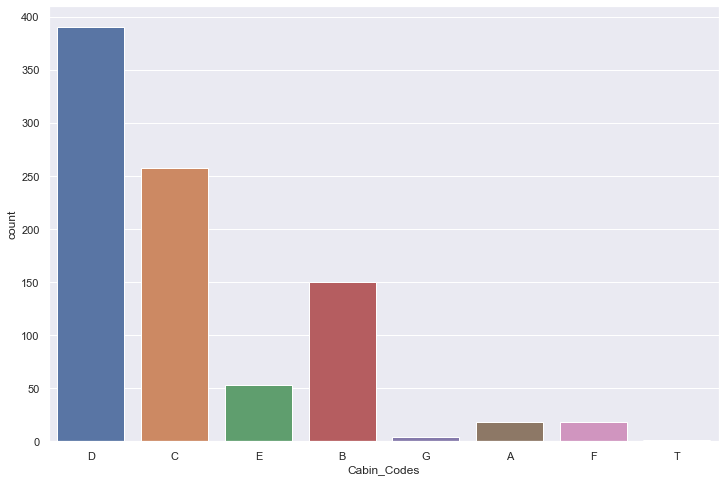

In [730]:
sns.countplot(data['Cabin_Codes'])

In [731]:
data.to_csv('train_1.csv',index=False)

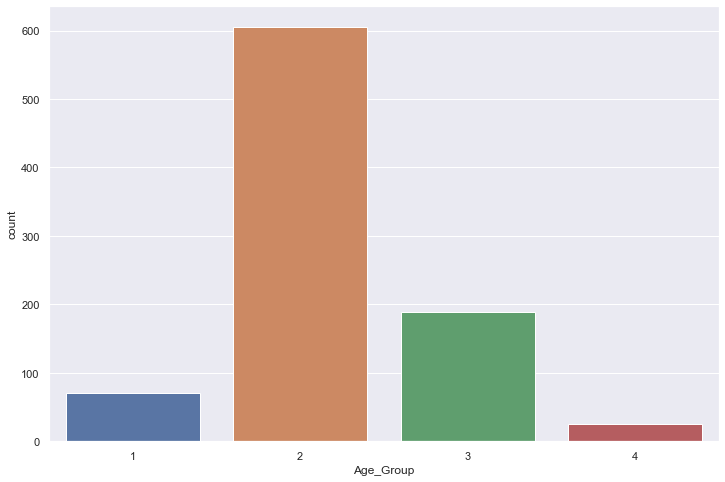

In [732]:
sns.countplot(data['Age_Group'])

# Data Processing test

In [629]:
t_data = pd.read_csv('test.csv')
test_data = t_data.copy()
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [757]:
test_data.Age = test_data.apply(transform_age,axis=1)
test_data['Fare'] = test_data['Fare'].fillna(method='ffill')
test_data['Cabin_Codes'] = test_data['Cabin'].apply(extract_cabin)
test_data['Age_Group'] = test_data['Age'].apply(get_age_group)
test_data['Title'] = test_data['Name'].apply(get_title)
print(test_data.isnull().sum())
print(test_data.head())

passenger_id = test_data.PassengerId

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
Cabin_Codes    327
Age_Group        0
Title            0
dtype: int64
   PassengerId  Pclass                                          Name     Sex  \
0          892       3                              Kelly, Mr. James    male   
1          893       3              Wilkes, Mrs. James (Ellen Needs)  female   
2          894       2                     Myles, Mr. Thomas Francis    male   
3          895       3                              Wirz, Mr. Albert    male   
4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female   

    Age  SibSp  Parch   Ticket     Fare Cabin Embarked Cabin_Codes  Age_Group  \
0  34.5      0      0   330911   7.8292   NaN        Q         NaN          2   
1  47.0      1      0   363272   7.0000   NaN        S         NaN          3 

In [759]:
test_data.Title.unique()

array(['Mr', 'Miss', 'Master', 'Ms', 'Col', 'Rev', 'Dr', 'Don'],
      dtype=object)

In [712]:
final_data,temp1,temp2 = process_cabin(test_data,fornull=True)
final_data.head()

C:\Users\Office\Anaconda3\envs\tensorflowenv\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,Age,SibSp,Parch,Fare,Pclass,Sex,Age_Group,Title
0,34.5,0,0,7.8292,3,male,2,Mr
1,47.0,1,0,7.0000,3,female,3,Mr
2,62.0,0,0,9.6875,2,male,4,Mr
3,27.0,0,0,8.6625,3,male,2,Mr
4,22.0,1,1,12.2875,3,female,2,Mr


In [711]:
final_data = pd.get_dummies(final_data,columns=['Pclass','Sex','Age_Group','Title'],drop_first=True)
#final_data = final_data.drop(['Age'],axis=1)

In [678]:
final_data.head()

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age_Group_1,...,Pclass_3.0,Sex_male,Age_Group_2.0,Age_Group_3.0,Age_Group_4.0,Title_Master,Title_Miss,Title_Mr,Title_Ms,Title_Rev
0,34.5,0.0,0.0,7.8292,0.0,0.0,1.0,0.0,1.0,0.0,...,1,1,1,0,0,0,0,1,0,0
1,47.0,1.0,0.0,7.0000,0.0,0.0,1.0,1.0,0.0,0.0,...,1,0,0,1,0,0,0,1,0,0
2,62.0,0.0,0.0,9.6875,0.0,1.0,0.0,0.0,1.0,0.0,...,0,1,0,0,1,0,0,1,0,0
3,27.0,0.0,0.0,8.6625,0.0,0.0,1.0,0.0,1.0,0.0,...,1,1,1,0,0,0,0,1,0,0
4,22.0,1.0,1.0,12.2875,0.0,0.0,1.0,1.0,0.0,0.0,...,1,0,1,0,0,0,0,1,0,0


In [496]:
temp = scaler.transform(final_data[['Age','Fare']])
final_data['Fare'] = temp[:,1]
final_data['Age'] = temp[:,0]

In [497]:
temp2['Codes'] = kres.predict(final_data)
test_data['Cabin_Codes'] = test_data['Cabin_Codes'].fillna(temp2['Codes'])
test_data

ValueError: Number of features of the model must match the input. Model n_features is 19 and input n_features is 15 

In [245]:
test_data.to_csv('test_1.csv',index=False)

In [547]:
temp = data.copy()

In [548]:
temp.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Cabin_Codes,Age_Group
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,D,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mr,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,D,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mr,C,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,D,2


In [592]:
from sklearn.preprocessing import OneHotEncoder

NameError: name 'Outer' is not defined

(397, 28)

In [716]:
obj.transform(final_data)

ValueError: The number of features in X is different to the number of features of the fitted data. The fitted data had 8 features and the X has 4 features.

In [703]:
CustomeEncoder(final_data,columns=['Pclass','Sex','Age_Group','Title'],drop=True)

,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Age_Group_2,Age_Group_3,Age_Group_4,Title_Master,Title_Miss,Title_Mr,Title_Ms,Title_Rev
0,34.50,0.0,0.0,7.8292,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,47.00,1.0,0.0,7.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,62.00,0.0,0.0,9.6875,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,27.00,0.0,0.0,8.6625,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,22.00,1.0,1.0,12.2875,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,14.00,0.0,0.0,9.2250,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,30.00,0.0,0.0,7.6292,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
7,26.00,1.0,1.0,29.0000,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,18.00,0.0,0.0,7.2292,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,21.00,2.0,0.0,24.1500,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


,Age,SibSp,Parch,Fare,Pclass_2,Pclass_3,Sex_male,Age_Group_2,Age_Group_3,Age_Group_4,Title_Master,Title_Miss,Title_Mr,Title_Ms,Title_Rev
0,34.5,0.0,0.0,7.8292,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,47.0,1.0,0.0,7.0000,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,62.0,0.0,0.0,9.6875,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
3,27.0,0.0,0.0,8.6625,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,22.0,1.0,1.0,12.2875,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [651]:
columns=['Pclass','Sex','Age_Group','Title']

In [657]:
feature_label = encoder.categories_
np.concatenate([(y+str(x)) for x,y in zip(feature_label,columns)])

ValueError: zero-dimensional arrays cannot be concatenated

In [663]:
for x,y in zip(columns,feature_label):
        print([x+'_'+str(z) for z in y])

['Pclass_1', 'Pclass_2', 'Pclass_3']
['Sex_female', 'Sex_male']
['Age_Group_1', 'Age_Group_2', 'Age_Group_3', 'Age_Group_4']
['Title_Dr', 'Title_Master', 'Title_Miss', 'Title_Mr', 'Title_Ms', 'Title_Rev']
